In [1]:
import pandas as pd
from lib.preprocessing import *
from lib.cleaning import *
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor   
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression, PLSCanonical, PLSSVD
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# %matplotlib inline
# import missingno as msno

### Exploration

In [11]:
df = load_sample(percentage=1)

In [12]:
cols = pd.Series(df.columns.format())

metrics = ["Temperature", "Precipitation in millimeters", "Distance (KM)"]  # 3 of these

ids = pd.concat([cols.loc[cols.str.match(".*Id.*")], cols.loc[cols.str.match(".*No.*")]]) # 3 of these

location = ["Pickup Lat", "Pickup Long", "Destination Lat", "Destination Long"] # 4 of these
times = cols.loc[cols.str.match(".*Time.*")] # 6(actually 4) of these

types = ["Vehicle Type", "Platform Type", "Personal or Business", ] # 3 of these


In [13]:
times

7                  Placement - Time
10              Confirmation - Time
13         Arrival at Pickup - Time
16                    Pickup - Time
19    Arrival at Destination - Time
28      Time from Pickup to Arrival
dtype: object

In [14]:
ids

1      User Id
27    Rider Id
0     Order No
dtype: object

In [15]:
desc = pd.read_csv("variable_definitions.csv")
desc

Variable Name  \
0                                    Order No   
1                                     User Id   
2                                Vehicle Type   
3                               Platform Type   
4                        Personal or Business   
5                    Placement - Day of Month   
6                Placement - Weekday (Mo = 1)   
7                            Placement - Time   
8                 Confirmation - Day of Month   
9             Confirmation - Weekday (Mo = 1)   
10                        Confirmation - Time   
11           Arrival at Pickup - Day of Month   
12       Arrival at Pickup - Weekday (Mo = 1)   
13                   Arrival at Pickup - Time   
14                      Pickup - Day of Month   
15                  Pickup - Weekday (Mo = 1)   
16                              Pickup - Time   
17      Arrival at Destination - Day of Month   
18  Arrival at Destination - Weekday (Mo = 1)   
19              Arrival at Destination - Time   
20                              Distance (KM)   
21                                Temperature   
22               Precipitation in millimeters   
23                                 Pickup Lat   
24                                Pickup Long   
25                            Destination Lat   
26                           Destination Long   
27                                   Rider Id   
28                Time from Pickup to Arrival   
29                              Rider Metrics   
30                                   Rider Id   
31                               No_Of_Orders   
32                                        Age   
33                             Average_Rating   
34                              No_of_Ratings   

                                          Description  
0                 Unique number identifying the order  
1   Unique number identifying the customer on a pl...  
2   For this competition limited to bikes, however...  
3   Platform used to place the order, there are 4 ...  
4                                       Customer type  
5                   Placement - Day of Month i.e 1-31  
6                    Placement - Weekday (Monday = 1)  
7   Placement - Time - Time of day the order was p...  
8                Confirmation - Day of Month i.e 1-31  
9                 Confirmation - Weekday (Monday = 1)  
10  Confirmation - Time - Time of day the order wa...  
11          Arrival at Pickup - Day of Month i.e 1-31  
12           Arrival at Pickup - Weekday (Monday = 1)  
13  Time of day the the rider arrived at the locat...  
14                     Pickup - Day of Month i.e 1-31  
15                      Pickup - Weekday (Monday = 1)  
16  Pickup - Time - Time of day the the rider pick...  
17        Arrival at Delivery - Day of Month i.e 1-31  
18         Arrival at Delivery - Weekday (Monday = 1)  
19  Arrival at Delivery Time - Time of day the rid...  
20            The distance from Pickup to Destination  
21  Temperature at the time of order placement in ...  
22  Precipitation at the time of order placement (...  
23                       Latitude of pick up location  
24                      Longitude of pick up location  
25                      Latitude of delivery location  
26                     Longitude of delivery location  
27             ID of the Rider who accepted the order  
28  Time in seconds between 'Pickup' and 'Arrival ...  
29                                                NaN  
30  Unique number identifying the rider (same as i...  
31           Number of Orders the rider has delivered  
32  Number of days since the rider delivered the f...  
33                        Average rating of the rider  
34  Number of ratings the rider has received. Rati...

<Axes: xlabel='Temperature', ylabel='Count'>

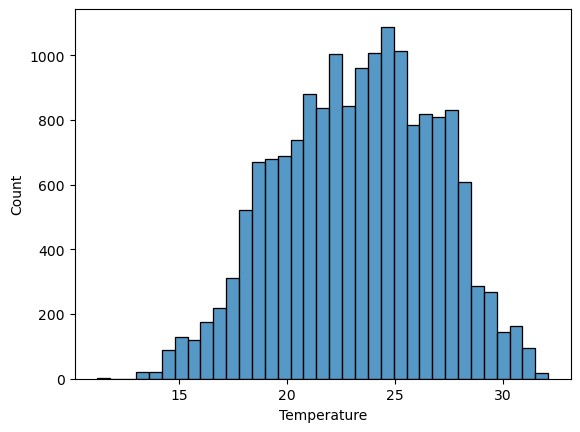

In [16]:
sns.histplot(df.Temperature, bins=35)

In [17]:
df.loc[(df['Placement - Day of Month'] < df["Pickup - Day of Month"])]

Order No       User Id Vehicle Type  Platform Type  \
8987   Order_No_3530  User_Id_2457         Bike              3   
12104  Order_No_2800  User_Id_1402         Bike              3   

      Personal or Business  Placement - Day of Month  \
8987              Business                        11   
12104             Business                        17   

       Placement - Weekday (Mo = 1) Placement - Time  \
8987                              2      12:22:05 PM   
12104                             1       2:34:37 PM   

       Confirmation - Day of Month  Confirmation - Weekday (Mo = 1)  ...  \
8987                            13                                4  ...   
12104                           18                                2  ...   

      Arrival at Destination - Time  Distance (KM)  Temperature  \
8987                     2:24:41 PM              8         22.5   
12104                    2:45:52 PM             11         25.6   

      Precipitation in millimeters  Pickup Lat  Pickup Long Destination Lat  \
8987                           NaN   -1.291548    36.829752       -1.255189   
12104                          NaN   -1.225322    36.808550       -1.281754   

       Destination Long      Rider Id Time from Pickup to Arrival  
8987          36.782203  Rider_Id_247                        1854  
12104         36.832423  Rider_Id_928                        2640  

[2 rows x 29 columns]

#### Post-model ideas

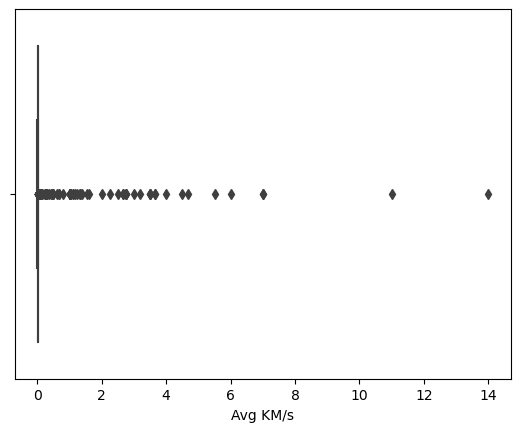

Slow/Fast people


39      3.666667
64      1.000000
241     1.333333
258     1.000000
305     0.800000
          ...   
1240    0.000684
1502    0.000863
1713    0.000353
1804    0.000829
1935    0.000400
Name: Avg KM/s, Length: 88, dtype: float64

In [19]:
df = load_sample(percentage=0.1, sql_db="data/cleaned_alex_emily_nelson.db")
df['Avg KM/s'] = df['Distance (KM)'] / df['Time from Pickup to Arrival']

sns.boxplot(df, x = "Avg KM/s")
plt.show()

speeders = df[df['Avg KM/s'] > 150/3600]
snails = df[df['Avg KM/s'] < 4/3600]
speed_anomalies = pd.concat([speeders, snails])
print(f"Slow/Fast people")
speed_anomalies['Avg KM/s']


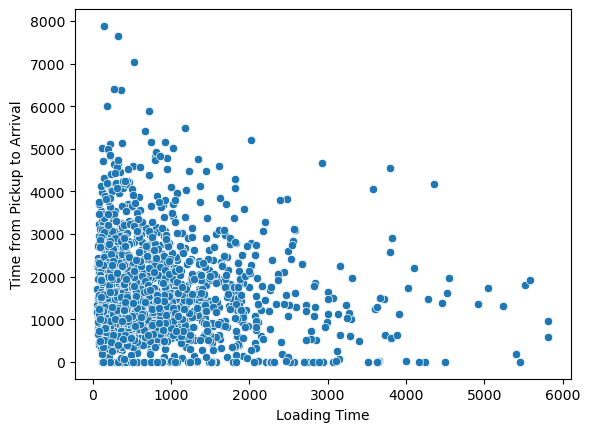

In [20]:
df['Loading Time'] = (df['Pickup - Time'].astype("datetime64") - df["Arrival at Pickup - Time"].astype("datetime64")).dt.total_seconds()
# sns.boxplot(x=df['Loading Time'])
# plt.show()

sns.scatterplot(df, x="Loading Time", y="Time from Pickup to Arrival")
plt.show()

In [21]:
probably_mistimed = df.loc[
    (df['Loading Time'] > (pd.to_timedelta(df['Time from Pickup to Arrival'], unit='sec').dt.total_seconds() * 1.5)) & \
    (df['Time from Pickup to Arrival'] < 10)
]

# ultra_weird = speed_anomalies.join(maybe_mistimed, how="inner", rsuffix='_d')
probably_mistimed[["Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", "Pickup - Time" , "Time from Pickup to Arrival", "Distance (KM)", "Avg KM/s"]]
# oof = maybe_mistimed[["Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", "Pickup - Time"]].copy()

# seconds_to_time_str = lambda s: f"{(s%(12*3600))//3600}:{(s%3600)//60:02d}:{s%60:02d} {'AM' if (s%(24*3600))//3600 < 12 else 'PM'}"
# df['Arrival at Destination - Time'] = get_seconds_from_dt_series(df["Pickup - Time"].astype("datetime64") + pd.to_timedelta(df["Time from Pickup to Arrival"], unit="sec")).apply(seconds_to_time_str)

Placement - Time Confirmation - Time Arrival at Pickup - Time  \
39         8:34:45 AM          8:35:35 AM               8:58:59 AM   
64         1:51:06 PM          2:24:50 PM               2:25:16 PM   
241        3:55:27 PM          3:55:39 PM               3:59:21 PM   
258       11:23:34 AM         11:24:13 AM              11:24:20 AM   
305        2:29:31 PM          2:30:22 PM               2:30:47 PM   
309       11:43:34 AM         11:43:42 AM              11:46:26 AM   
354       12:51:13 PM         12:52:27 PM              12:52:58 PM   
401       10:42:03 AM         10:51:02 AM              11:02:55 AM   
557        1:19:57 PM          1:20:17 PM               1:33:53 PM   
630        3:24:46 PM          3:25:59 PM               3:38:32 PM   
649        2:49:52 PM          3:07:43 PM               3:22:20 PM   
699       12:28:33 PM         12:29:01 PM              12:29:40 PM   
761        1:59:46 PM          1:59:53 PM               1:59:56 PM   
784        3:38:49 PM          3:39:52 PM               3:39:59 PM   
790        4:01:18 PM          4:32:35 PM               5:00:05 PM   
799       12:49:34 PM         12:49:41 PM              12:49:50 PM   
854        7:59:09 AM          7:59:20 AM               7:59:26 AM   
958        1:58:59 PM          2:44:55 PM               2:44:59 PM   
1031       4:08:09 PM          4:11:32 PM               4:33:41 PM   
1071      12:02:58 PM         12:03:06 PM              12:03:10 PM   
1095       2:38:37 PM          2:39:43 PM               2:41:25 PM   
1290       4:16:51 PM          4:17:40 PM               4:17:43 PM   
1312      10:06:18 AM         10:32:44 AM              11:00:34 AM   
1338       3:42:33 PM          3:52:51 PM               3:58:14 PM   
1346       2:54:32 PM          2:54:56 PM               2:55:02 PM   
1408      10:50:39 AM         10:50:51 AM              10:51:03 AM   
1455      12:14:09 PM         12:14:09 PM              12:24:27 PM   
1512       2:59:03 PM          2:59:47 PM               3:05:48 PM   
1584      11:20:08 AM         11:20:28 AM              11:25:54 AM   
1622      12:43:19 PM         12:43:41 PM              12:50:00 PM   
1690       4:01:36 PM          4:03:16 PM               4:10:28 PM   
1710       8:40:54 AM          8:41:01 AM               8:43:26 AM   
1711      11:33:14 AM         11:50:36 AM              11:51:30 AM   
1738       1:13:33 PM          1:19:32 PM               1:25:59 PM   
1747       2:41:07 PM          2:41:34 PM               2:41:41 PM   
1748       1:23:26 PM          1:30:12 PM               1:30:17 PM   
1761      10:03:42 AM         10:04:30 AM              10:10:17 AM   
1770      10:52:47 AM         10:58:10 AM              10:58:13 AM   
1792       9:51:14 AM         10:04:59 AM              10:19:53 AM   
1813      11:35:25 AM         11:35:35 AM              11:35:44 AM   
1829      10:40:50 AM         10:41:14 AM              10:42:51 AM   
1867      12:45:09 PM          1:54:41 PM               1:59:40 PM   
1881      11:04:08 AM         11:04:44 AM              11:07:40 AM   
1895       3:50:52 PM          3:51:52 PM               3:55:16 PM   
1916       2:00:41 PM          2:01:10 PM               2:10:11 PM   
1917       8:56:56 AM          8:57:10 AM               8:57:24 AM   
1976       8:51:53 AM          8:52:03 AM               8:52:08 AM   
1994       1:34:32 PM          1:34:32 PM               1:36:02 PM   
2014       2:15:46 PM          2:17:20 PM               2:17:26 PM   
2029      12:22:45 PM          1:03:51 PM               1:28:38 PM   
2097       3:37:06 PM          4:00:32 PM               4:00:51 PM   
2114       8:55:42 AM          8:55:59 AM               8:56:13 AM   

     Pickup - Time  Time from Pickup to Arrival  Distance (KM)   Avg KM/s  
39      9:41:51 AM                            3             11   3.666667  
64      3:16:19 PM                            8              8   1.000000  
241     4:04:19 PM                            3              4   1

### Cleaning Data

#### Nelson cleaned data

In [22]:
df = load_sample(percentage=1, csv_file="data/train_full.csv")
df = drops(df)
df = impute_temperature(df)
df = combine_weekdays(df)
df.head(3)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IterativeImputer was fitted without feature names
  warnings.warn(


TypeError: tuple indices must be integers or slices, not str

<Axes: xlabel='Temperature', ylabel='Count'>

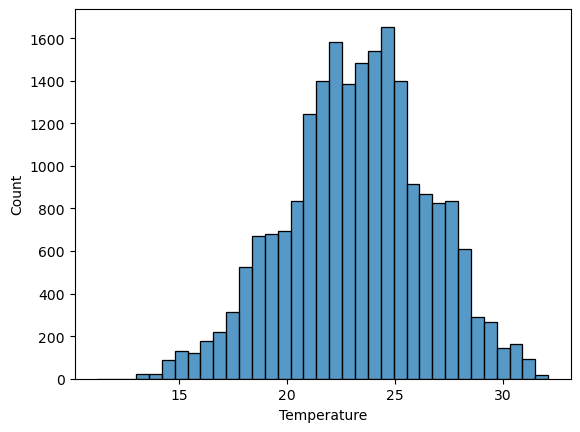

In [ ]:
sns.histplot(df.Temperature, bins=35)

#### Emily Cleaning

In [ ]:
data = load_sample(percentage = 1, sql_db='data/cleaned_nelson.db')

for i in ['Order No', 'User Id', "Rider Id"]:
    under = i.replace(' ', '_')
    data.rename(columns={i: under}, inplace=True)
    data[under] = data[under].str.replace(f'{under}_', '')
    data[under] = data[under].astype(int)

save_data(data, sql_db='data/cleaned_emily.db')

#### Merging Emily w/ Nelson

In [ ]:
em = load_sample(percentage=1, sql_db="data/cleaned_emily.db")
em.rename({
    "Order_No" : "order_no",
    "User_Id" : "user_id",
    "Rider_Id" : "rider_id"
}, axis=1, inplace=True)
em.head(3)

order_no  user_id Vehicle Type  Platform Type Personal or Business  \
0     10013     1824         Bike              3             Business   
1     17510     2330         Bike              3             Business   
2     10446      978         Bike              1             Personal   

   Placement - Day of Month  Placement - Weekday (Mo = 1) Placement - Time  \
0                        31                             3       3:43:55 PM   
1                        26                             2       6:33:37 PM   
2                        20                             3      12:48:38 PM   

  Confirmation - Time Arrival at Pickup - Time  ... Distance (KM)  \
0          3:53:57 PM               4:01:38 PM  ...             6   
1          7:13:57 PM               7:24:11 PM  ...             7   
2         12:48:45 PM              12:56:31 PM  ...            25   

   Temperature  Pickup Lat  Pickup Long  Destination Lat  Destination Long  \
0         26.8   -1.267400    36.798654        -1.297213         36.786212   
1         22.7   -1.232571    36.808392        -1.264960         36.798178   
2         20.1   -1.308407    36.834501        -1.430298         36.961368   

   rider_id  Time from Pickup to Arrival  Fulfillment - Weekday (Su = 0)  \
0        19                         1358                               3   
1        72                         1182                               2   
2       549                         1943                               3   

   Fulfillment - Day of Month  
0                          31  
1                          26  
2                          20  

[3 rows x 21 columns]

In [ ]:
save_data(em, sql_db="data/cleaned_emily_nelson.db")

#### Alex Cleaning

In [ ]:
riders = pd.read_csv("data/riders.csv")

# rename cols-- easier to work with
riders.rename(columns= {
    "Rider Id": "id",
    "No_Of_Orders": "orders",
    "Age": "age",
    "Average_Rating": "average_rating",
    "No_of_Ratings": "number_rating" 
}, inplace=True)

# drop "Rider_Id_" in "id" column
riders.id.replace('Rider_Id_', ' ',regex=True,inplace=True)

riders.head(3)

id  orders   age  average_rating  number_rating
0   396    2946  2298            14.0           1159
1   479     360   951            13.5            176
2   648    1746   821            14.3            466

In [ ]:
save_data(riders, sql_db="data/cleaned_Alex.db")

#### Merging Alex w/ Emily+Nelson

In [ ]:
riders_clean = load_sample(percentage=1, sql_db="data/cleaned_Alex.db")
riders_clean["id"] = riders_clean["id"].astype(int)
riders_clean.set_index("id", inplace=True)
riders_clean.head(3)
# riders_clean.dtypes

orders   age  average_rating  number_rating
id                                              
452     570   741            14.0             98
574    1753  1011            13.8            472
150     179   493            15.0              3

In [ ]:
other_clean = load_sample(percentage=1, sql_db="data/cleaned_emily_nelson.db")
other_clean.head(3)

order_no  user_id Vehicle Type  Platform Type Personal or Business  \
0     14660     1796         Bike              3             Business   
1     25887     1075         Bike              3             Business   
2     12793      111         Bike              3             Business   

   Placement - Day of Month  Placement - Weekday (Mo = 1) Placement - Time  \
0                        14                             4       3:18:22 PM   
1                         5                             3       5:02:33 PM   
2                        19                             2      12:43:18 PM   

  Confirmation - Time Arrival at Pickup - Time  ... Distance (KM)  \
0          3:21:19 PM               3:21:29 PM  ...            13   
1          5:33:55 PM               5:44:37 PM  ...            10   
2         12:43:54 PM              12:43:59 PM  ...            13   

   Temperature  Pickup Lat  Pickup Long  Destination Lat  Destination Long  \
0         27.4   -1.303596    36.778378        -1.331619         36.847976   
1         22.5   -1.301446    36.766138        -1.252796         36.800313   
2         26.5   -1.255189    36.782203        -1.327035         36.866736   

   rider_id  Time from Pickup to Arrival  Fulfillment - Weekday (Su = 0)  \
0       669                         1765                               4   
1       685                         1452                               3   
2       576                         3159                               2   

   Fulfillment - Day of Month  
0                          14  
1                           5  
2                          19  

[3 rows x 21 columns]

In [ ]:
cleaned_all = other_clean.join(riders_clean, on="rider_id", rsuffix="_rider")
cleaned_all.head(3)

order_no  user_id Vehicle Type  Platform Type Personal or Business  \
0     14660     1796         Bike              3             Business   
1     25887     1075         Bike              3             Business   
2     12793      111         Bike              3             Business   

   Placement - Day of Month  Placement - Weekday (Mo = 1) Placement - Time  \
0                        14                             4       3:18:22 PM   
1                         5                             3       5:02:33 PM   
2                        19                             2      12:43:18 PM   

  Confirmation - Time Arrival at Pickup - Time  ... Destination Lat  \
0          3:21:19 PM               3:21:29 PM  ...       -1.331619   
1          5:33:55 PM               5:44:37 PM  ...       -1.252796   
2         12:43:54 PM              12:43:59 PM  ...       -1.327035   

   Destination Long  rider_id  Time from Pickup to Arrival  \
0         36.847976       669                         1765   
1         36.800313       685                         1452   
2         36.866736       576                         3159   

   Fulfillment - Weekday (Su = 0)  Fulfillment - Day of Month  orders   age  \
0                               4                          14    6728  2702   
1                               3                           5     487   560   
2                               2                          19    1486   454   

   average_rating  number_rating  
0            13.9           2027  
1            13.7             44  
2            14.2            151  

[3 rows x 25 columns]

In [ ]:
save_data(cleaned_all, sql_db="data/cleaned_alex_emily_nelson.db")

#### Final Cleaning

In [ ]:
df = load_sample(percentage=1, sql_db="data/cleaned_alex_emily_nelson.db")
avg_kms = df['Distance (KM)'] / df['Time from Pickup to Arrival']

speeders = df[avg_kms > 150/3600]
snails = df[avg_kms < 4/3600]
speed_anomalies = pd.concat([speeders, snails])

df = df.drop(speed_anomalies.index)

In [ ]:
# l_time = (df['Pickup - Time'].astype("datetime64") - df["Arrival at Pickup - Time"].astype("datetime64")).dt.total_seconds()
# probably_mistimed = df.loc[
#     # (l_time > (pd.to_timedelta(df['Time from Pickup to Arrival'], unit='sec').dt.total_seconds() * 1.5)) & \
#     (df['Time from Pickup to Arrival'] < 60)
# ]

# probably_mistimed[["Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", "Pickup - Time" , "Time from Pickup to Arrival", "Distance (KM)"]]
# df.drop(probably_mistimed.index)

In [ ]:
save_data(df, sql_db="data/cleaned_train.db")

### Model

#### Preparing

In [2]:
df = load_sample(percentage=1, sql_db="data/cleaned_train.db")

df["Placement - Time"] = get_seconds_from_dt_series(df['Placement - Time'])
df["Confirmation - Time"] = get_seconds_from_dt_series(df['Confirmation - Time'])
df["Arrival at Pickup - Time"] = get_seconds_from_dt_series(df['Arrival at Pickup - Time'])
df["Pickup - Time"] = get_seconds_from_dt_series(df['Pickup - Time'])
df["Business"] = (df['Personal or Business'] == "Business").astype(float)
df["place_to_confirm"] = df["Confirmation - Time"] - df["Placement - Time"]
df["confirm_to_pick_arr"] = df["Arrival at Pickup - Time"] - df["Confirmation - Time"]
df["pick_arr_to_pick"] = df['Pickup - Time'] - df["Arrival at Pickup - Time"]
df['platform_3'] = (df['Platform Type'] == 3).astype(float)
df.drop(columns=["Personal or Business", "Vehicle Type", "Platform Type"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   order_no                        20252 non-null  int64  
 1   user_id                         20252 non-null  int64  
 2   Placement - Day of Month        20252 non-null  int64  
 3   Placement - Weekday (Mo = 1)    20252 non-null  int64  
 4   Placement - Time                20252 non-null  int64  
 5   Confirmation - Time             20252 non-null  int64  
 6   Arrival at Pickup - Time        20252 non-null  int64  
 7   Pickup - Time                   20252 non-null  int64  
 8   Distance (KM)                   20252 non-null  int64  
 9   Temperature                     20252 non-null  float64
 10  Pickup Lat                      20252 non-null  float64
 11  Pickup Long                     20252 non-null  float64
 12  Destination Lat                 

In [3]:
train, test = train_test_split(df, test_size=0.2)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train.shape

(16201, 27)

In [4]:
dont_scale = ["order_no", "user_id", "rider_id", "Business", "platform_3", 'Time from Pickup to Arrival']


scaler = StandardScaler()
s = scaler.fit(train[train.columns[~train.columns.isin(dont_scale)]])

In [5]:
train = pd.concat([
        pd.DataFrame(
            scaler.transform(train[train.columns[~train.columns.isin(dont_scale)]]), 
            columns = df.columns[~df.columns.isin(dont_scale)]
        ),
        train[df.columns[df.columns.isin(dont_scale)]]
    ], 
    join="inner",
    axis=1
)

In [6]:
xtest = scaler.transform(test[df.columns[~df.columns.isin(dont_scale)]])
test = pd.concat([
        pd.DataFrame(xtest, columns = df.columns[~df.columns.isin(dont_scale)]), 
        test[df.columns[df.columns.isin(dont_scale)]]
    ], 
    axis=1
)

In [7]:
if False:
    sns.pairplot(train[[
        # "Placement - Day of Month", 
        # "Placement - Weekday (Mo = 1)", 
        # "Placement - Time", 
        # "Confirmation - Time",
        # "Arrival at Pickup - Time",
        # "Pickup - Time",
        "place_to_confirm",
        "confirm_to_pick_arr",
        "pick_arr_to_pick",
        "Distance (KM)",
        "Temperature",
        # "Pickup Lat",
        # "Pickup Long",
        # "Destination Lat",
        # "Destination Long",
        # "Fulfillment - Weekday (Su = 0)",
        # "Fulfillment - Day of Month",
        "orders",
        "age",
        "average_rating",
        "number_rating",
        "Business"
    ]])

#### Tuning

In [8]:
def assess_model(model) -> pd.DataFrame:
    return pd.DataFrame(cross_validate(
        model, 
        train[train.columns[train.columns!='Time from Pickup to Arrival']],
        train[['Time from Pickup to Arrival']],
        scoring={"neg_mse": "neg_mean_squared_error", "neg_mae": "neg_mean_absolute_error"}
    ))

models = {
    "DTree": DecisionTreeRegressor(random_state=42),
    "OLS" : LinearRegression(),
    "Lasso" : Lasso(random_state=42),
    "Ridge" : Ridge(random_state=42),
    "PLSReg" : PLSRegression(),
    "PLSCan" : PLSCanonical(),
    # "PLSSVD" : PLSSVD()
    # (KNeighborsRegressor(n_neighbors=20), "20-KNN"),
    # (SGDRegressor(), "SGD"),
    # (GaussianProcessRegressor(), "Gaussian"),
    # (MLPRegressor(), "Dense NN")
}

In [9]:
import warnings
warnings.filterwarnings('ignore')
rfes = {}
for name, model in models.items():
    rfe = RFECV(estimator=model, scoring="neg_mean_absolute_error")
    rfe.fit(
        train[train.columns[train.columns!='Time from Pickup to Arrival']], 
        train[['Time from Pickup to Arrival']]
    )

    print('Selected', rfe.n_features_, f'features for {name}:')
    print(train.columns[train.columns!='Time from Pickup to Arrival'][rfe.support_], end='\n\n')

    rfes[name] = rfe

warnings.filterwarnings('default')

Selected 14 features for DTree:
Index(['Pickup - Time', 'Distance (KM)', 'Temperature', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'orders', 'age',
       'average_rating', 'place_to_confirm', 'confirm_to_pick_arr',
       'pick_arr_to_pick', 'order_no', 'rider_id'],
      dtype='object')

Selected 20 features for OLS:
Index(['Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Fulfillment - Weekday (Su = 0)',
       'Fulfillment - Day of Month', 'orders', 'age', 'average_rating',
       'number_rating', 'place_to_confirm', 'confirm_to_pick_arr',
       'pick_arr_to_pick', 'platform_3'],
      dtype='object')

Selected 16 features for Lasso:
Index(['Placement - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Long', 'Destination Lat',
       'D

In [10]:
results = {}
for mod, rfe in rfes.items():
    results[mod] = pd.DataFrame(rfes[mod].cv_results_).iloc[-1]
    print(f"Scores for {mod}:")
    print(results[mod], end='\n\n')

Scores for DTree:
mean_test_score     -715.613184
std_test_score         7.105768
split0_test_score   -703.426412
split1_test_score   -714.875926
split2_test_score   -716.048457
split3_test_score   -718.306173
split4_test_score   -725.408951
Name: 25, dtype: float64

Scores for OLS:
mean_test_score     -514.434079
std_test_score         3.869441
split0_test_score   -518.324764
split1_test_score   -518.780355
split2_test_score   -510.967620
split3_test_score   -515.001803
split4_test_score   -509.095853
Name: 25, dtype: float64

Scores for Lasso:
mean_test_score     -514.398396
std_test_score         4.036560
split0_test_score   -518.262265
split1_test_score   -518.937971
split2_test_score   -510.270002
split3_test_score   -515.403337
split4_test_score   -509.118405
Name: 25, dtype: float64

Scores for Ridge:
mean_test_score     -514.396308
std_test_score         3.935764
split0_test_score   -518.340660
split1_test_score   -518.841428
split2_test_score   -510.658946
split3_test_score   

In [11]:
def component_plots(mod: str) -> None:
    rfe = rfes[mod]
    cols = train.columns[train.columns!='Time from Pickup to Arrival'][rfe.support_]
    X = train[cols]
    Y = train[['Time from Pickup to Arrival']]
    model = rfe.estimator
    model.fit(X, Y)
    pred = model.predict(X)

    fig, ax = plt.subplots(1, len(cols), sharey=True)
    fig.set_size_inches((len(cols) * 6, 6))
    plt.ylabel("Time from Pickup to Arrival")
    ys = train[['Time from Pickup to Arrival']]
    for xax, col_name in enumerate(cols):
        xs = train[col_name]
        ax[xax].scatter(xs, ys)
        ax[xax].scatter(xs, pred)
        ax[xax].set(xlabel=col_name)
    plt.show()

DTree:


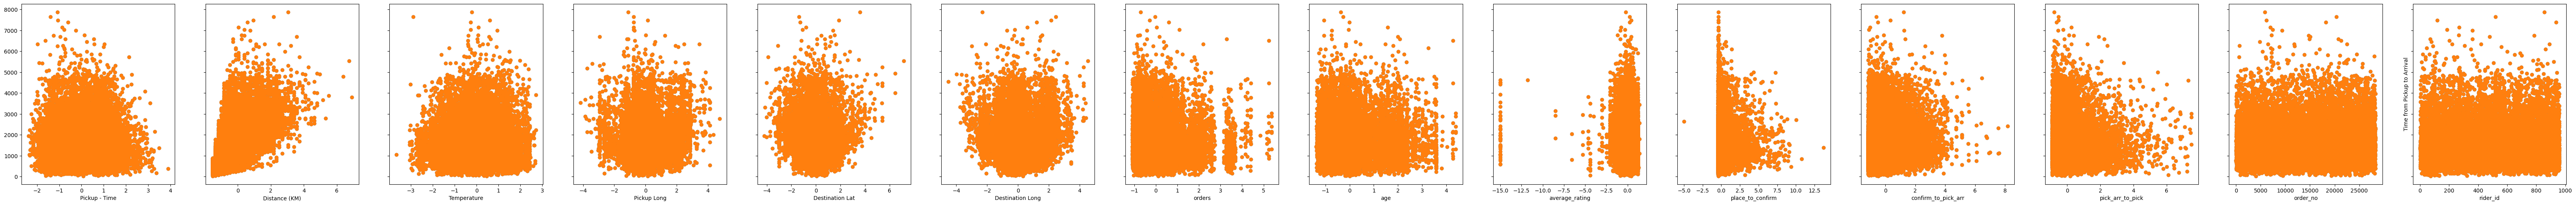

OLS:


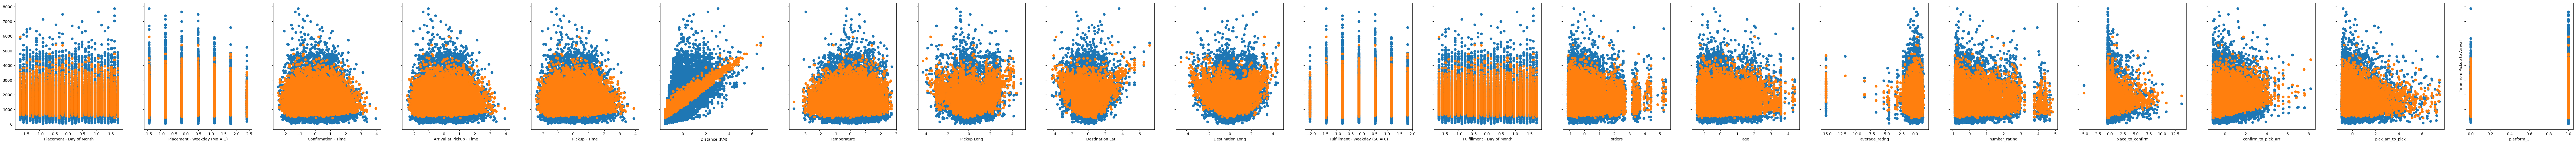

Lasso:


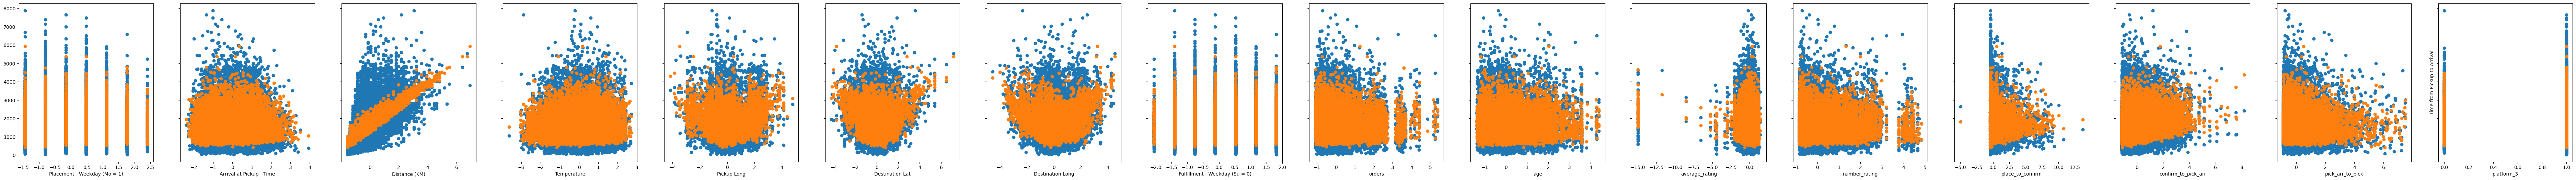

Ridge:


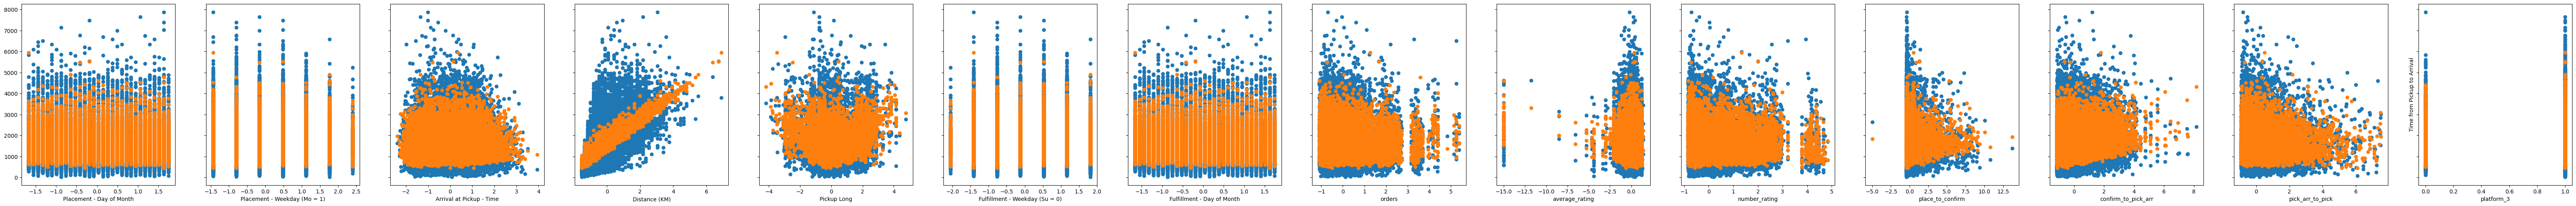

PLSReg:


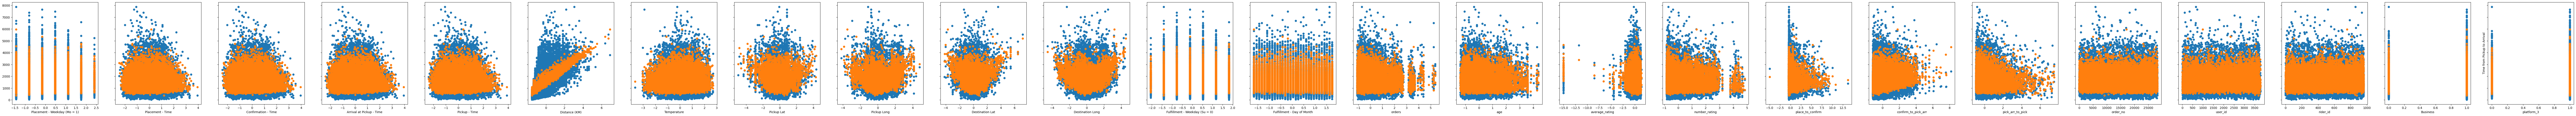

PLSCan:


/opt/conda/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:245: FutureWarning: As of version 0.24, n_components(2) should be in [1, min(n_features, n_samples, n_targets)] = [1, 1]. n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(


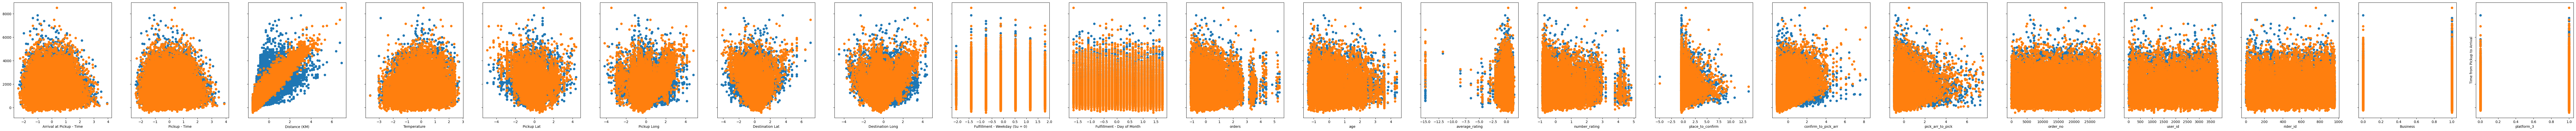

In [12]:
# if False:
for mod in models.keys():
    print(f"{mod}:")
    component_plots(mod)

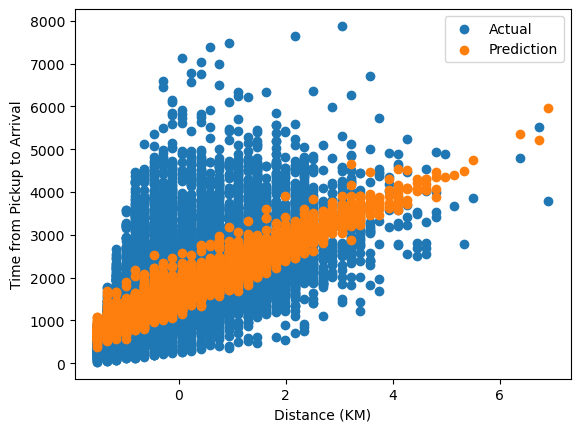

In [13]:
mod = "PLSReg"
x_feature = "Distance (KM)"
ys = train['Time from Pickup to Arrival']
pred = rfes[mod].estimator.predict(train[train.columns[train.columns!='Time from Pickup to Arrival'][rfes[mod].support_]])
plt.scatter(train[x_feature], ys, label="Actual")
plt.scatter(train[x_feature], pred, label="Prediction")
plt.xlabel(x_feature)
plt.ylabel("Time from Pickup to Arrival")
plt.legend()
plt.show()

In [14]:
plsr_train_X = train[train.columns[train.columns!='Time from Pickup to Arrival'][rfes['PLSReg'].support_]]
train_y = train[['Time from Pickup to Arrival']]

plsr_test_X = test[test.columns[test.columns!='Time from Pickup to Arrival'][rfes['PLSReg'].support_]]
test_y = test[['Time from Pickup to Arrival']]

#### Testing

In [15]:
def test_model(model, test_X):
    mae = mean_absolute_error(test_y, model.predict(test_X))
    mape = mean_absolute_percentage_error(test_y, model.predict(test_X))
    return { "MAE" : mae, 'MA%E' : mape }

    
models['PLSReg'].fit(plsr_train_X, train_y)

PLSRegression()

In [16]:
test_model(models['PLSReg'], plsr_test_X)

{'MAE': 511.2291504436337, 'MA%E': 0.43535367895273586}

### Submission

##### Data Prep

###### Train

In [17]:
df, imputer, scaler = prep_train()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IterativeImputer was fitted without feature names
  warnings.warn(


###### Test

In [18]:
test = prep_test(imputer, scaler)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IterativeImputer was fitted without feature names
  warnings.warn(


#### Predict

In [19]:
df.columns[df.columns!='Time from Pickup to Arrival'][rfes["PLSReg"].support_]

Index(['Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Fulfillment - Weekday (Su = 0)',
       'Fulfillment - Day of Month', 'orders', 'age', 'average_rating',
       'number_rating', 'place_to_confirm', 'confirm_to_pick_arr',
       'pick_arr_to_pick', 'Order_No', 'user_id', 'Rider_Id', 'Business',
       'platform_3'],
      dtype='object')

In [20]:
cols = df.columns[df.columns!='Time from Pickup to Arrival'][rfes["PLSReg"].support_]
model = PLSRegression()
model.fit(df[cols], df["Time from Pickup to Arrival"])

PLSRegression()

In [32]:
times = pd.DataFrame(model.predict(test[cols]).round().astype(int), columns=["Time from Pickup to Arrival"])
submission = pd.concat([
    test[["Order_No"]],
    times
], axis=1)
submission
submission.to_csv("data/pls_regression_submission.csv")